# Tarea: Ecuaciones Ordinarias


In [32]:
#Importacion de librerias
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True) 
%matplotlib notebook
#%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm
from sklearn.linear_model import LinearRegression

##  Punto 1:

Muestre que los siguientes operadores diferenciales:

$$f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h}$$
$$f''(x) = \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$


son consistentes. Use la función de prueba $f (x) = x^2$ y $f (x) = \sin x$ .


- $f(x)=x^2$
    1) Primera derivada
    
    $$f'(x) = \lim_{h\rightarrow0}\frac{-(x+2h)^2+4(x+h)^2-3x^2}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{-x^2-4hx-4h^2+4x^2+8xh+4h^2-3x^2}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{4xh}{2h}$$
    $$f'(x) = 2x$$

    2) Segunda derivada
    
    $$f''(x) = \lim_{h\rightarrow0}\frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{(x+h)^2-2x^2+(x-h)^2}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{x^2+2xh+h^2-2x^2+x^2-2xh+h^2}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{h^2+h^2}{h^2}$$
    $$f''(x) = 2$$
    
- $f (x) = \sin x$
    1) Primera derivada
    $$f'(x) = \lim_{h\rightarrow0}\frac{-\sin(x+2h)+4\sin(x+h)-3\sin(x)}{2h}$$
    $$f'(x) = \lim_{h\rightarrow0}\frac{-\sin(x)\cos(2h)-\sin(2h)\cos(x)+4\sin(x)\cos(h)+4     \sin(h)\cos(x)-3\sin(x)}{2h}$$
    $$f'(x)=\lim_{h\rightarrow0}\frac{\sin(x)(-\cos(2h)+4\cos(h)-3)}{2h}+\lim_{h\rightarrow0}\frac{\cos(x)(-\sin(2h)+4\sin(h))}{2h}$$
    $$f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{-\cos(2h)+4\cos(h)-3}{2h}+\cos(x)\lim_{h\rightarrow0}\frac{-\sin(2h)+4\sin(h)}{2h}$$
    
    Aplicando l'hopital tenemos lo siguiente:
    
    $$f'(x)=\sin(x)\lim_{h\rightarrow0}\frac{2\sin(2h)-4\sin(h)}{2}+\cos(x)\lim_{h\rightarrow0}\frac{-2\cos(2h)+4\cos(h)}{2}$$
    
    Remplazando $h\rightarrow0$ tenemos: 
    
    $$f'(x)=\sin(x)\frac{2\sin(2\times 0)-4\sin(0)}{2}+\cos(x)(-\cos(2\times0)+2\cos(0))$$
    $$f'(x)=\sin(x)\frac{0}{2}+\cos(x)(-1+2)$$
    $$f'(x)=0+\cos(x)$$
    $$f'(x)=\cos(x)$$
    
    2) Segunda derivada
    $$f''(x) = \lim_{h\rightarrow0}\frac{\sin(x+h)-2\sin(x)+\sin(x-h)}{h^2}$$
    $$f''(x) = \lim_{h\rightarrow0}\frac{\sin(x)\cos(h)+\sin(h)\cos(x)-2\sin(x)+\sin(x)\cos(h)-\sin(h)\cos(x)}{h^2}$$
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{\cos(h)-2+\cos(h)}{h^2}+\cos(x)\lim_{h\rightarrow0}\frac{\sin(h)-\sin(h)}{h^2}$$
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{2\cos(h)-2}{h^2}$$
    Dado que el límite implican una forma indeterminada, aplicamos l'hopital:
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}\frac{-2\sin(h)}{2h}$$
    Aplicamos otra vez l'hopital: 
    $$f''(x) = \sin(x)\lim_{h\rightarrow0}(-\cos(h))$$
    Evaluamos el límite y obtenemos: 
    $$f''(x) = \sin(x)(-\cos(0))$$
    $$f''(x) = -\sin(x)$$

Los operadores diferenciales son consistentes.

##  Punto 2:

Usando el código de la clase, genere 10 esferas localizadas aleatoriamente en la mesa A = 40 × 40 con velocidad aleatorias entre $−5 m/s$ y $5 m/s$. Simule 10 s con un paso de integración de $h = 0.001 s$ y reduzca la simulación en un factor de 200; quitando la interacción con la pared. Conteste las siguientes preguntas exponiendo los conceptos físicos involucrados.

In [67]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        self.VEk = np.zeros(len(t))
        self.ep = 0.
        self.EP = np.zeros(len(t))
    
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        
        
        self.a = self.f/self.m
        
        # Euler
        self.r = self.r + self.dt*self.v
        self.v = self.v + self.dt*self.a
        
        # Euler-Cromer
        #self.v = np.add(self.v, self.dt*self.a)
        #self.r = np.add(self.r, self.dt*self.v)
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d     
            self.f = np.add(self.f,Fn*self.n) 
            self.ep += (self.K/4)*(compresion**4)
            
     
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.ep = 0.

    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
        self.EP[i] = self.ep
        
    def SetPotentialEnergy(self,i):
        self.EP[i] = self.ep
    

    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.EP[::scale]
    

    
    # Debes agregar las paredes en este punto
    def CheckLimits(self):
        
        for i in range(2):
            
            if self.r[i] + self.radius > 20 and self.v[i] > 0.:
                self.v[i] = -self.v[i]
            elif self.r[i] - self.radius < -20 and self.v[i] < 0.:
                self.v[i] = -self.v[i]
                

In [222]:
def GetParticles(N,t):

    Particles = []
    for i in range(0,10):
        r = np.random.randint(-20,20,2)
        v = np.random.randint(-5,5, 2)
        a = np.array([0,0])
        p = Particle(r,v,a,t,m=1,radius=2,Id=i)
        Particles.append(p)
    return Particles

In [223]:
dt = 0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(1,t)

In [224]:
def RunSimulation(t,Particles):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
    
    return Particles

In [225]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|███████████| 10000/10000 [00:07<00:00, 1347.75 Steps/s]


<IPython.core.display.Javascript object>


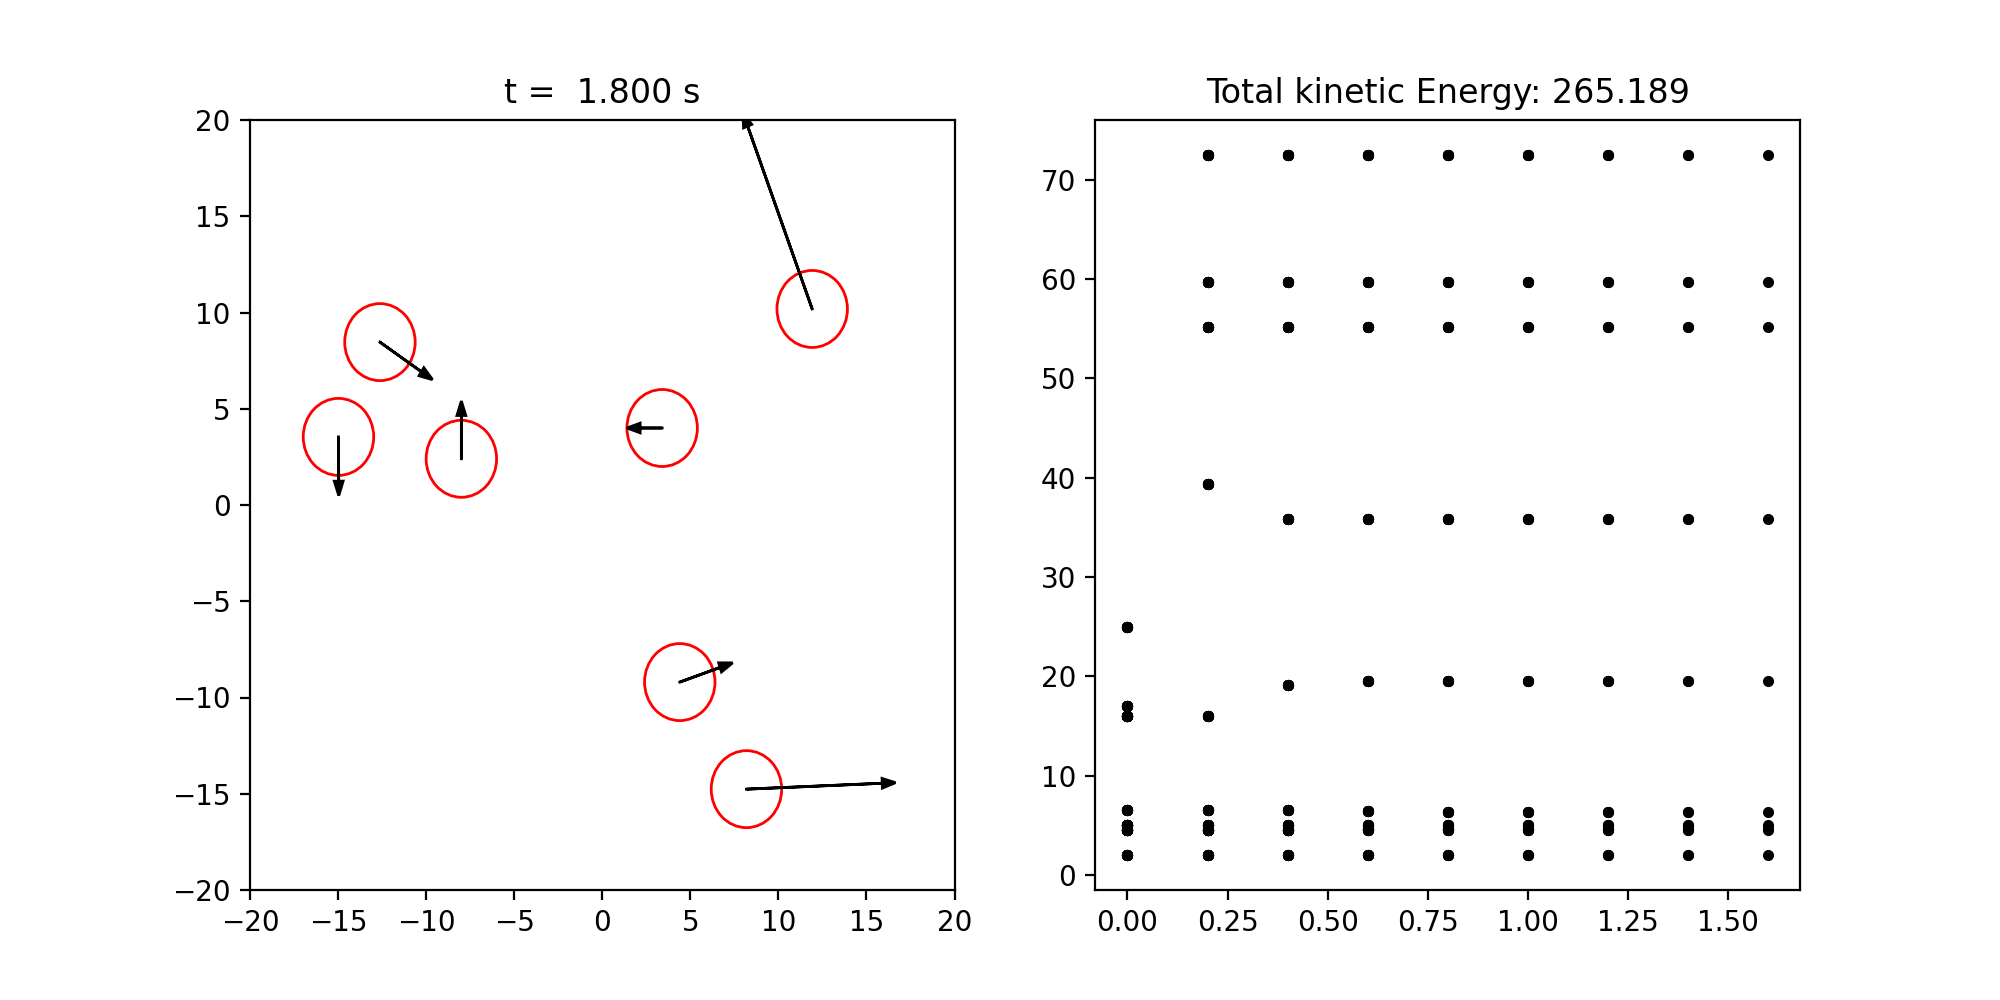

In [226]:
scale = 200
t1 = t[::scale]
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [227]:
MomentumT = Particles[0].GetMomentum(scale)
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))

In [228]:
fm = np.sqrt(MomentumT[:,0]**2 + MomentumT[:,1]**2)

<IPython.core.display.Javascript object>


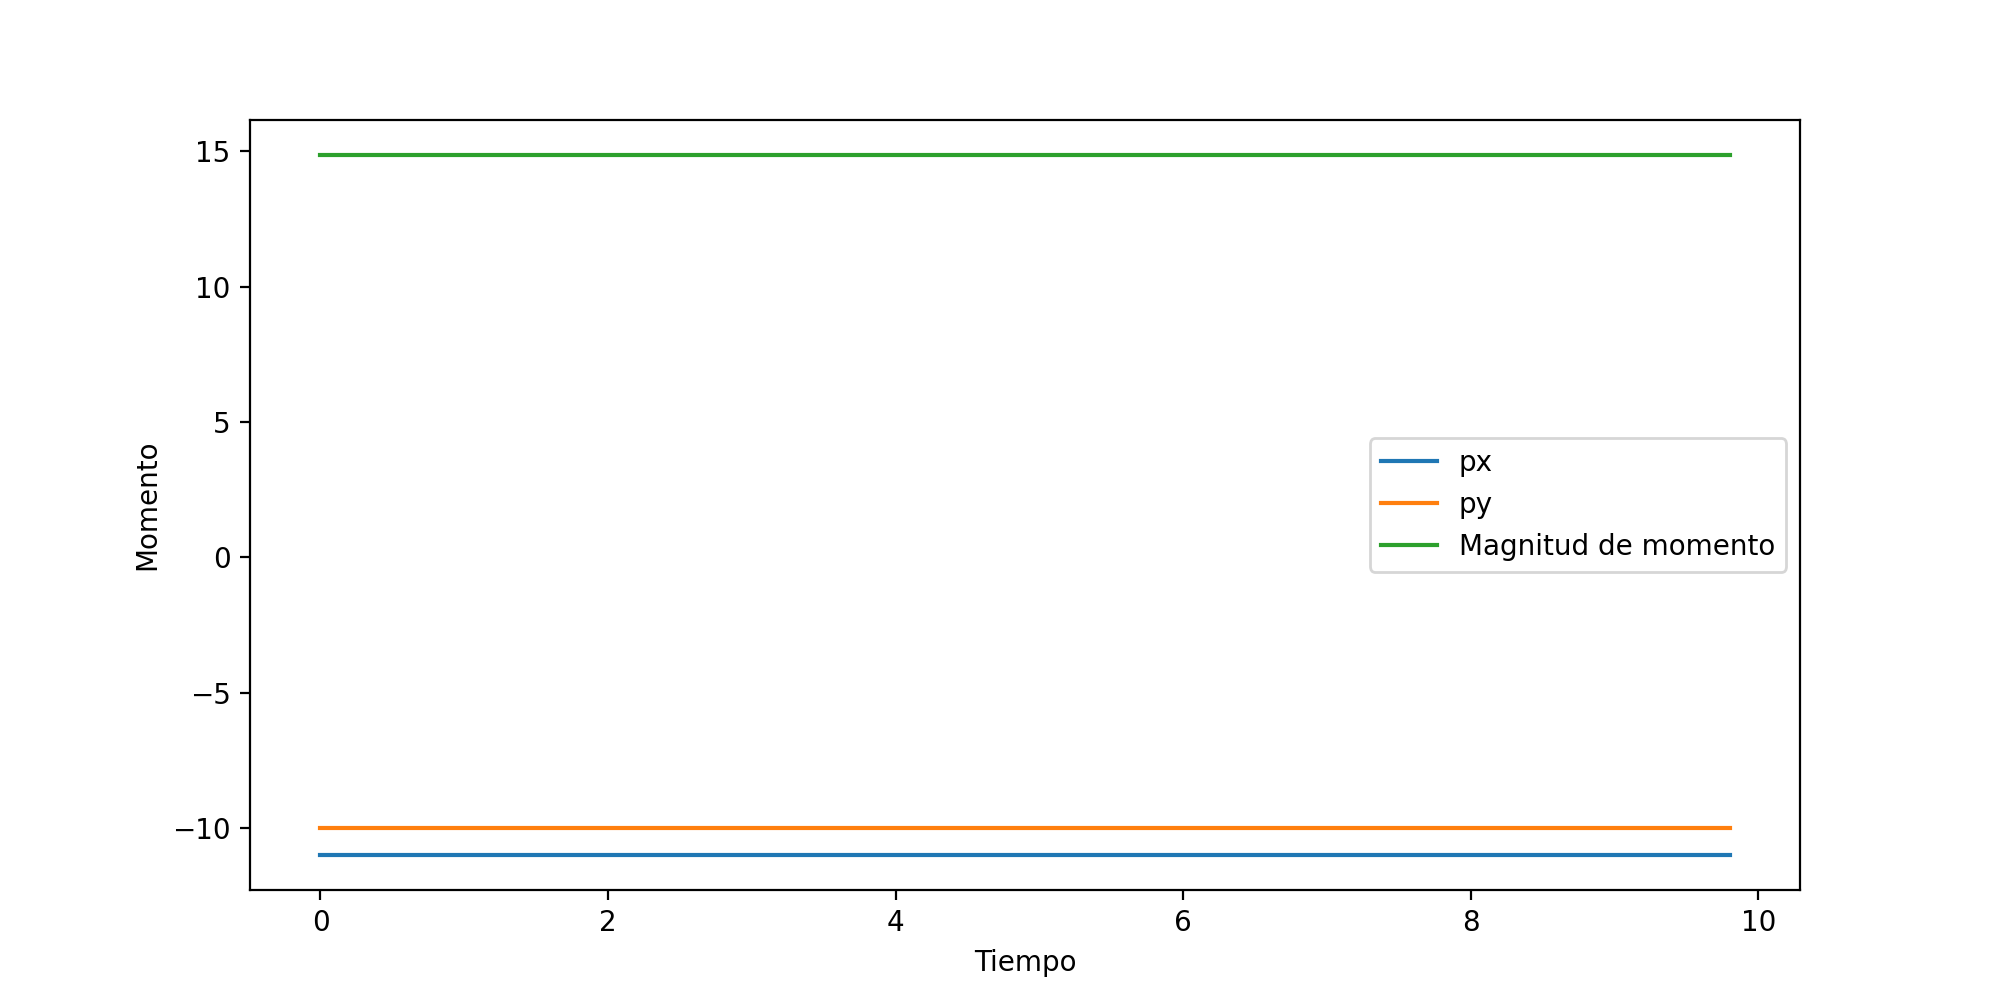

In [229]:
plt.figure(figsize=(10,5))
plt.plot(t1,MomentumT[:,0],label='px')
plt.plot(t1,MomentumT[:,1],label='py')
plt.plot(t1, fm, label="Magnitud de momento")
plt.xlabel("Tiempo")
plt.ylabel("Momento")
plt.legend()
plt.show()

a) Grafique el momento lineal total en x (p_x) en función del tiempo. Se debería conservar?

El momento lineal se debería conservar puesto que en las colisiones se transfiere entre objetos. De acuerdo a la gráfica sí lo hace.

b) Grafique el momento lineal total en y ($p_y$) en función del tiempo. Se debería conservar?

El momento lineal se debería conservar puesto que en las colisiones se transfiere entre objetos. De acuerdo a la gráfica sí lo hace.

c) Teóricamente muestre que la fuerza de contacto es conservativa. Encuentre la energía potencial.

Partiendo de la fórmula de la fuerza de contacto

 $f(\vec{r_1}, \vec{r_2}) = K [R1 + R2 - |\vec{r_1} - \vec{r_2}|]^3 \hat{n}$

haciendo el cambio de coordenadas a cartesianas con $z=0$

$f(x,y,z) = K \big[R1+R2-\sqrt{x^2+y^2}]^3 \left(\frac{x\vec{i}}{\sqrt{x^2 + y^2}}, \frac{y\vec{j}}{\sqrt{x^2 + y^2}} ,0\right)$

Entonces se tiene que

$\nabla \times f = 0$

Por lo tanto la fuerza es conservativa.

Teniendo en cuenta que el potencial $U$ de una fuerza conservativa se expresa tal que $F = -\nabla U$, y que la fuerza de contacto tiene un único componente radial, entonces:

$f = - \frac{dU(r)}{dr}$

$- \int f = U(r)$

reescribiendo $f(r)$ con un componente radial único, expresado como la compresión, entonces $f(r) = -Kr^3 \hat{n}$.

Realizando la integral:

$U(r) = - \int -Kr^3 dr  = K \frac{r^4}{4}$

Con lo cual, el potencial de la fuerza de contacto será $U(r) = K \frac{r^4}{4}$, donde r es el factor de compresión.


d) Grafique la energía cinética total en función del tiempo. Se conserva?

<IPython.core.display.Javascript object>


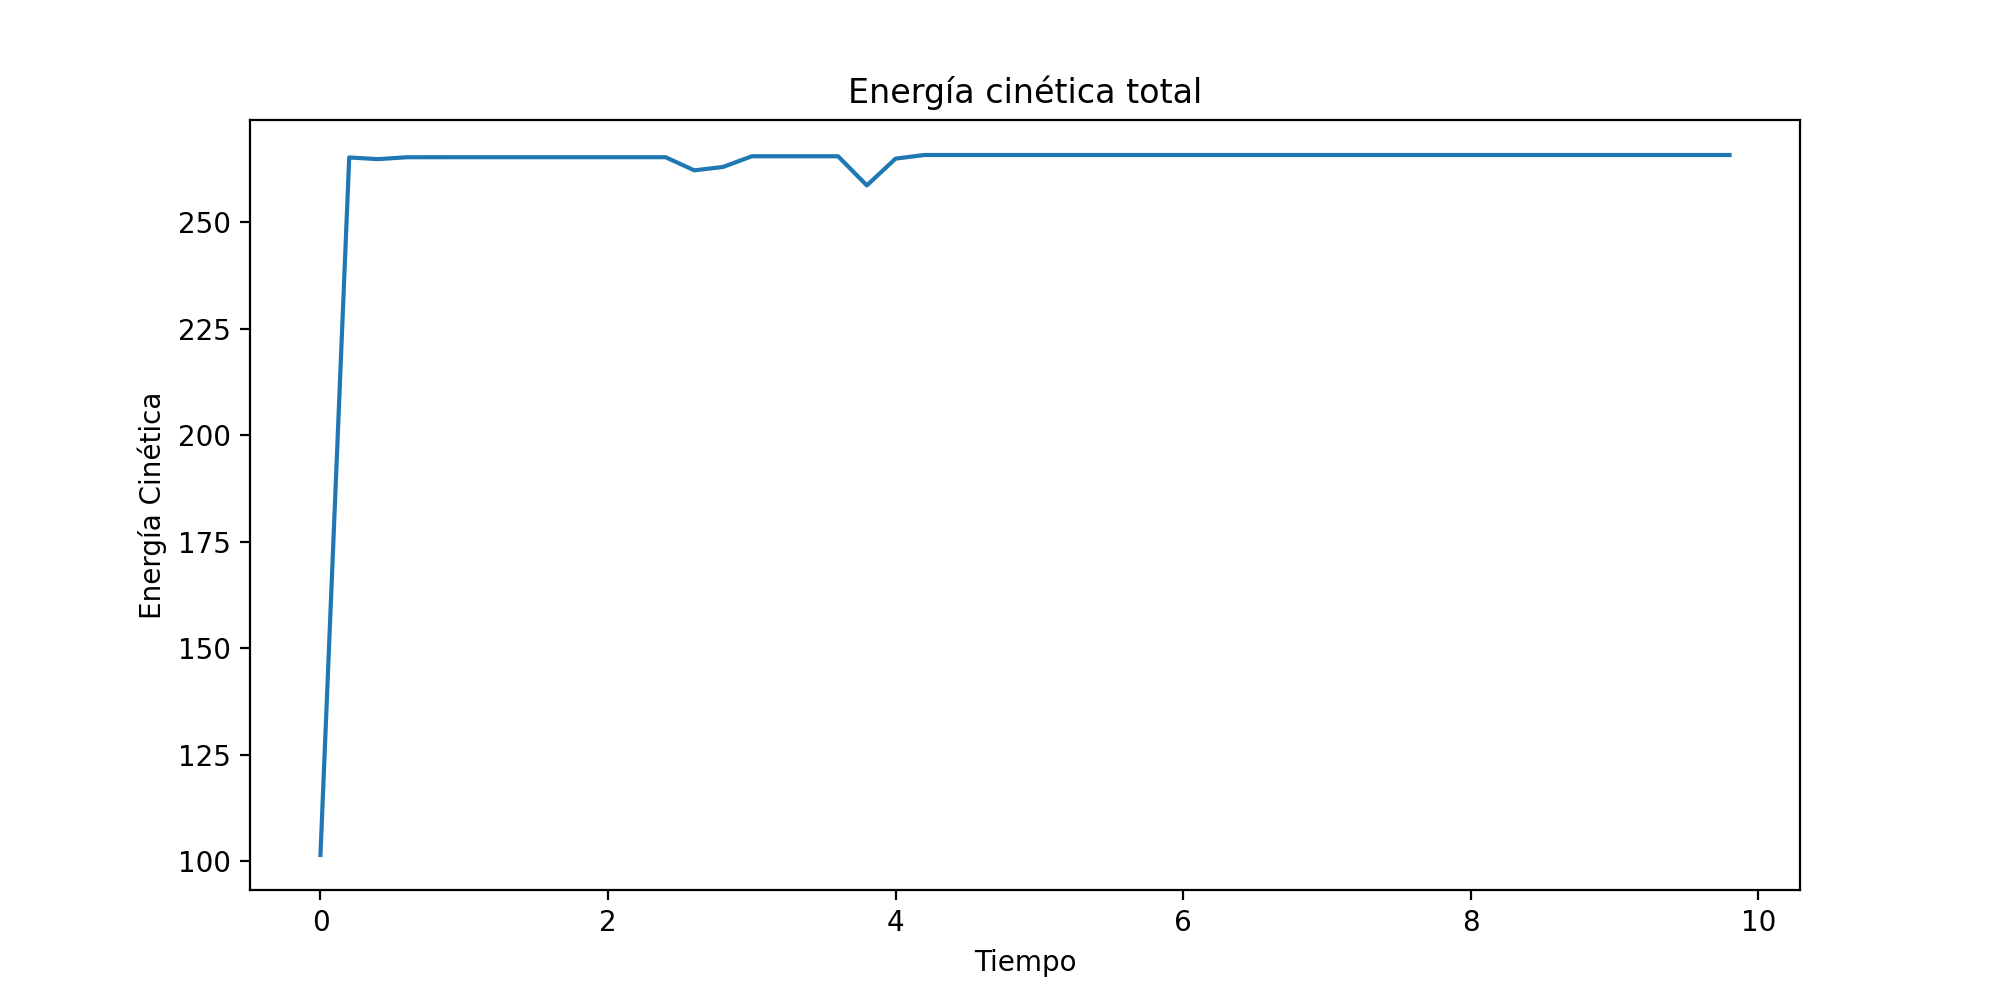

In [230]:
KineticT = Particles[0].GetKineticEnergy(scale)

for i in range(1,len(Particles)):
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))

plt.figure(figsize=(10,5))
plt.plot(t1,KineticT,label='Energía Cinética')
plt.xlabel("Tiempo")
plt.title("Energía cinética total")
plt.ylabel("Energía Cinética")
plt.show()

La energía cinética no se conserva puesto que hay cierta deformación entre las partículas, en donde existe pérdida de energía. 

e) Grafique la energía potencial total en función del tiempo. ¿Qué significa que el potencial sea positivo?

<IPython.core.display.Javascript object>


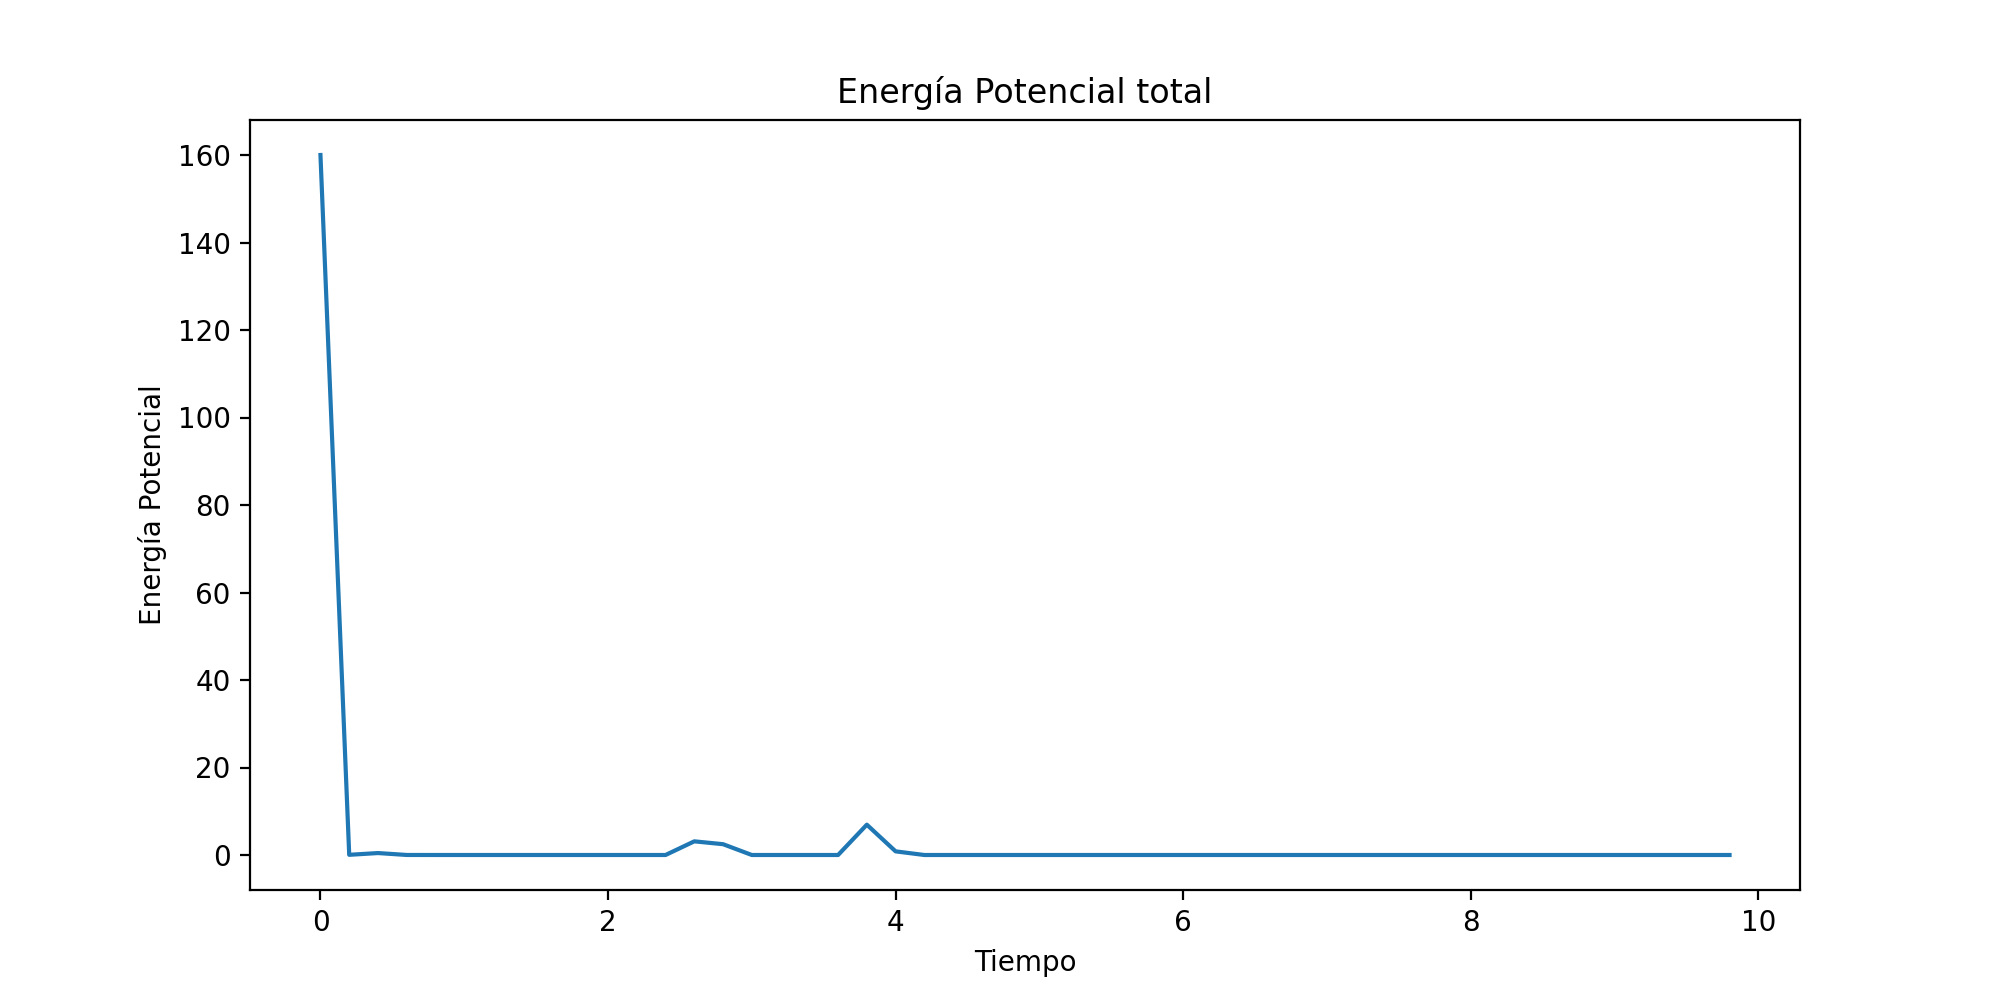

In [231]:
PotentiaT = Particles[0].GetPotentialEnergy(scale)
for i in range(1,len(Particles)):
    PotentiaT = np.add(PotentiaT,Particles[i].GetPotentialEnergy(scale))

plt.figure(figsize=(10,5))
plt.plot(t1,PotentiaT/2,label='Energía Potencial')
plt.xlabel("Tiempo")
plt.title("Energía Potencial total")
plt.ylabel("Energía Potencial")
plt.show()

f) Grafique la energía mecánica total en función del tiempo. Se conserva? Explique a nivel físico y a nivel del método de Euler.

<IPython.core.display.Javascript object>


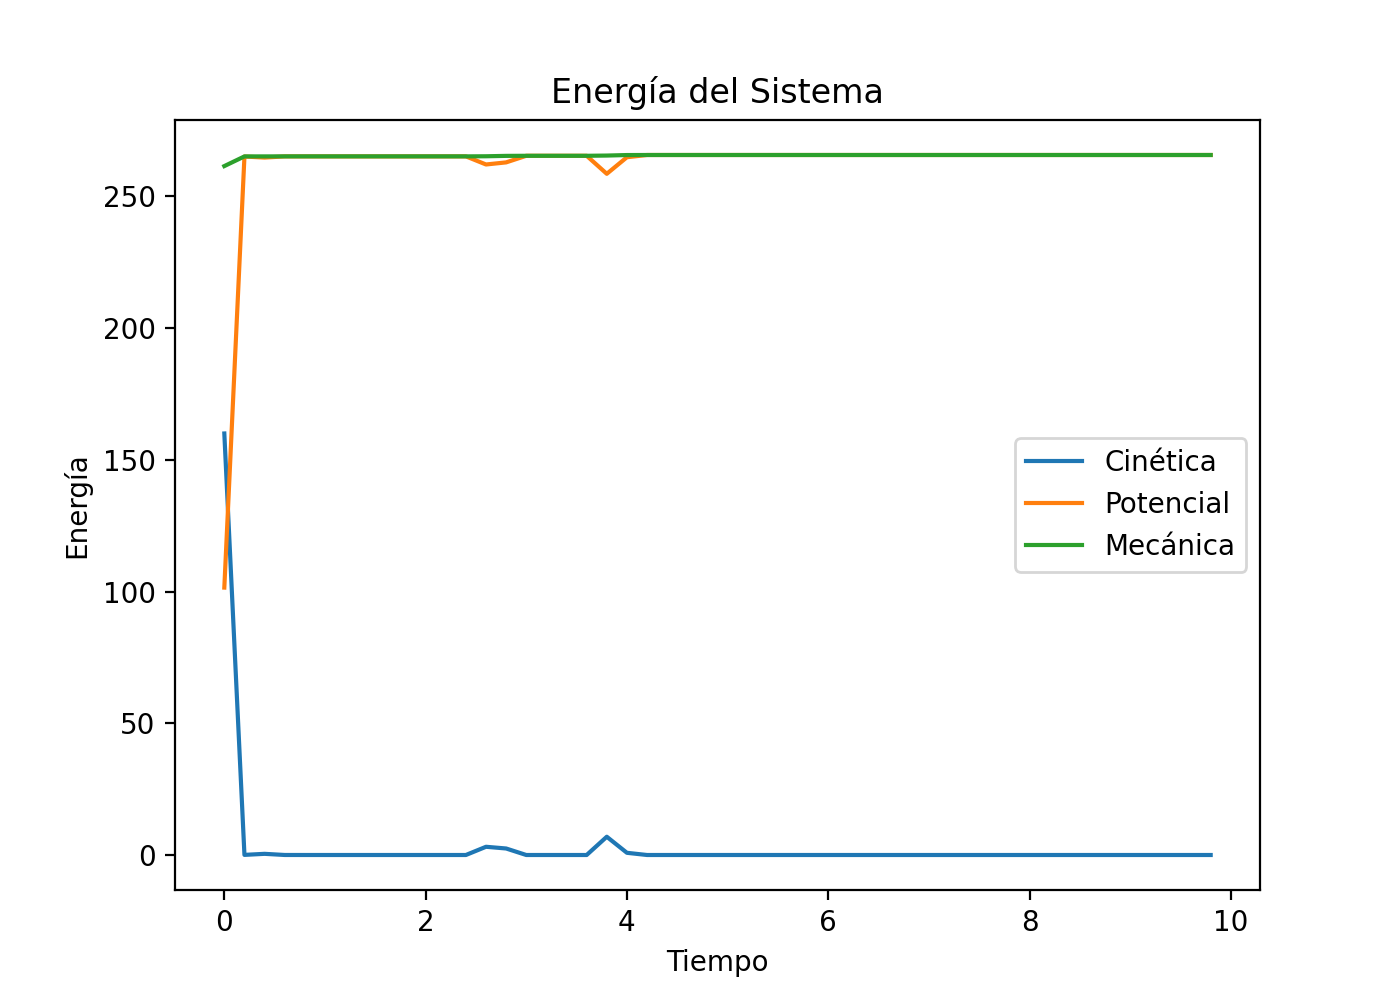

In [232]:
plt.figure(figsize=(7,5))
plt.plot(t1,PotentiaT/2,label='Cinética')
plt.plot(t1,KineticT,label='Potencial')
plt.plot(t1,KineticT+(PotentiaT/2),label='Mecánica')
plt.xlabel("Tiempo")
plt.legend()
plt.title("Energía del Sistema")
plt.ylabel("Energía")
plt.show()

g) Se cumple el teorema del trabajo y la energía en su simulación? Argumente

En las simulaciones y gráficas, se evidencia que el teorema del trabajo-energía se cumple. Donde en la gráfica de energía mecánica se evidencia que el trabajo potencial aplicado a una partícula es igual a su cambio de energía cinética. Lo cual la suma de estas dos debe ser igual en todo su dominio de tiempo. 

h) Calcule y grafique el momento angular en el eje z (L_z). Se conserva?

[-32.         -32.00812826 -32.00813732 -32.00813732 -32.00856109
 -32.01251661 -32.01307611 -32.01190984 -31.98806031 -31.98509976
 -31.98509976 -31.98509976 -31.98509976 -31.98511996 -31.98635326
 -31.98709474 -31.98709556 -31.98629917 -31.97802524 -31.97596402
 -31.975964   -31.975964   -31.97597342 -31.97691752 -31.9784896
 -31.97862526 -31.97862526 -31.97862526 -31.97862526 -31.97862526
 -31.97862526 -31.97862526 -31.97862526 -31.97862526 -31.97862526
 -31.97862526 -31.97862526 -31.97862526 -31.97862526 -31.97862526
 -31.97862526 -31.97862526 -31.97862526 -31.97862526 -31.97862526
 -31.97862526 -31.97862526 -31.97862526 -31.97862526 -31.97862526]


<IPython.core.display.Javascript object>


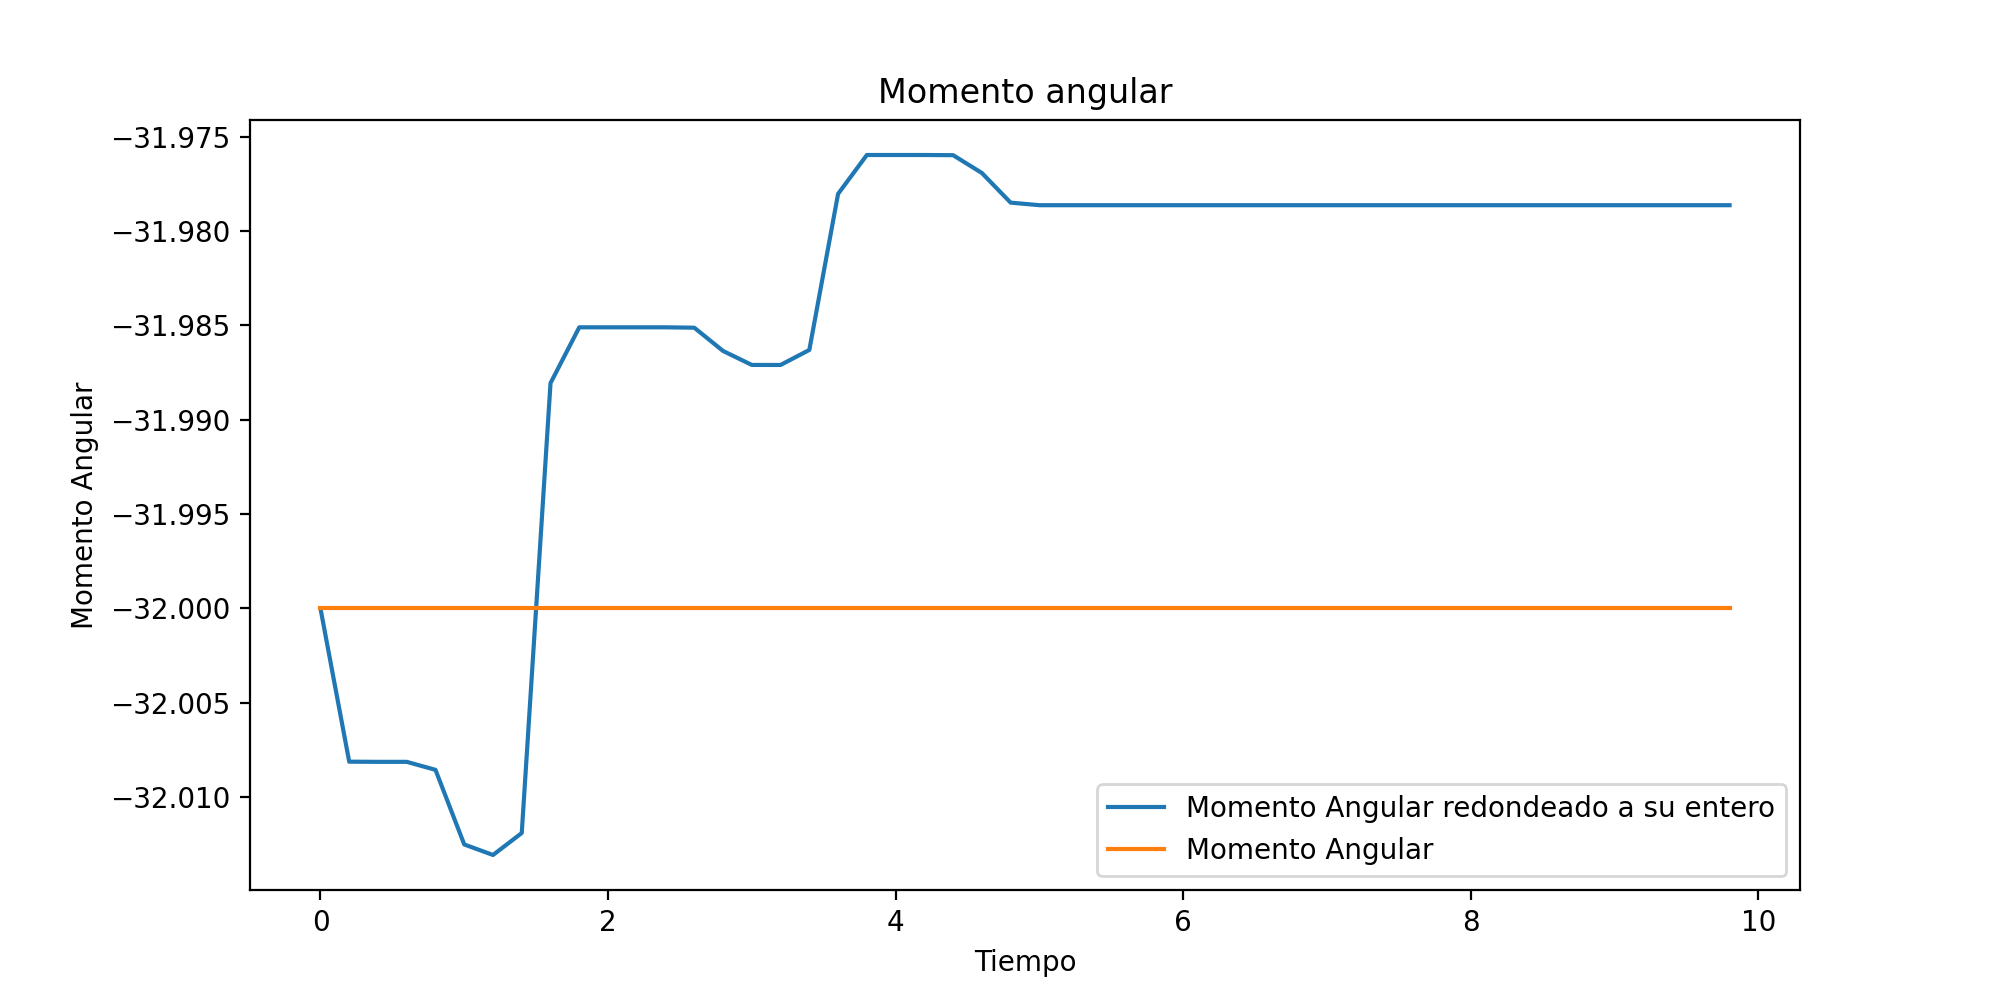

In [149]:
L_z = np.cross(Particles[0].GetPosition(scale), Particles[0].GetMomentum(scale))

for i in range(1,len(Particles)):
    L_z = np.add(L_z, np.cross(Particles[i].GetPosition(scale), Particles[i].GetMomentum(scale)))

plt.figure(figsize=(10,5))
plt.plot(t1,L_z,label='Momento Angular redondeado a su entero')
plt.plot(t1, np.round(L_z), label="Momento Angular")
plt.xlabel("Tiempo")
plt.title("Momento angular")
plt.ylabel("Momento Angular")
plt.legend()
plt.show()
    

En la anterior gráfica se puede evidenciar que es constante el valor del momento angular por medio de un redondeo, no obstante, se puede evidenciar en la linea azul que el momento tiene unos saltos esto es debido al uso de Euler-Cromer.

i) Si este sistema que se mueve en 2D se extendiera a 3D, las partículas se mantendrían en el mismo plano de movimiento o se moverían en todo el volumen?

Considerando que tendremos otro grado de libertad las particulas no se mantendrian en el mismo plano de movimiento; cabe resaltar que se pondria una posición y una velocidad asociada a todas las particulas, generando colisiones en los tres-ejes.

## Punto 3
Escriba la velocidad de la luz $c = 3 × 10^8 m/s$ en unidades de au/año

In [150]:
c = 3*10**8 #m/s
#considerando que un año tiene 365 dias
anho = 365*86400 #seg
au = 1.496*10**11 #m
conversion = round(c*anho/au,2)

print("La velocidad de la luz es", conversion, "[au/año]")

La velocidad de la luz es 63240.64 [au/año]


## Punto 4

Usando el código visto en clase comprobar la tercera ley de Kepler para todos los planetas del sistema solar (hasta la órbita de Jupiter). Use un paso temporal adecuado ($\Delta t = 0.001$). Tomar los semi-ejes mayores y excentricidad de Internet.

In [152]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        
        Dist = np.linalg.norm(self.R,axis=1)
        
        timeup = []
        
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
            
        return timeup

a) Tome los semi-ejes mayores y excentricidad de Internet.

In [153]:
def GetPlanetas(t):
    
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.093,1.524,t)
    Jupiter = Planeta(0.049,5.2044,t)
    
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]


In [154]:
dt = 0.001
tmax = 1000
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [155]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [156]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|██████| 1000000/1000000 [01:33<00:00, 10671.42 Steps/s]


In [14]:
Planetas[1].GetPerihelio()

[0.552,
 1.167,
 1.782,
 2.3970000000000002,
 3.013,
 3.628,
 4.243,
 4.8580000000000005,
 5.473,
 6.089,
 6.704,
 7.319,
 7.934,
 8.549,
 9.164,
 9.78,
 10.395,
 11.01,
 11.625,
 12.24,
 12.855,
 13.471,
 14.086,
 14.701,
 15.316,
 15.931000000000001,
 16.547,
 17.162,
 17.777,
 18.392,
 19.007,
 19.622,
 20.238,
 20.853,
 21.468,
 22.083000000000002,
 22.698,
 23.313,
 23.929000000000002,
 24.544,
 25.159,
 25.774,
 26.389,
 27.005,
 27.62,
 28.235,
 28.85,
 29.465,
 30.080000000000002,
 30.696,
 31.311,
 31.926000000000002,
 32.541000000000004,
 33.156,
 33.771,
 34.387,
 35.002,
 35.617,
 36.232,
 36.847,
 37.463,
 38.078,
 38.693,
 39.308,
 39.923,
 40.538000000000004,
 41.154,
 41.769,
 42.384,
 42.999,
 43.614000000000004,
 44.229,
 44.845,
 45.46,
 46.075,
 46.69,
 47.305,
 47.92,
 48.536,
 49.151,
 49.766,
 50.381,
 50.996,
 51.612,
 52.227000000000004,
 52.842,
 53.457,
 54.072,
 54.687,
 55.303000000000004,
 55.918,
 56.533,
 57.148,
 57.763,
 58.378,
 58.994,
 59.609,
 60.2

In [15]:
scale = 20
t1 = t[::scale]

<IPython.core.display.Javascript object>


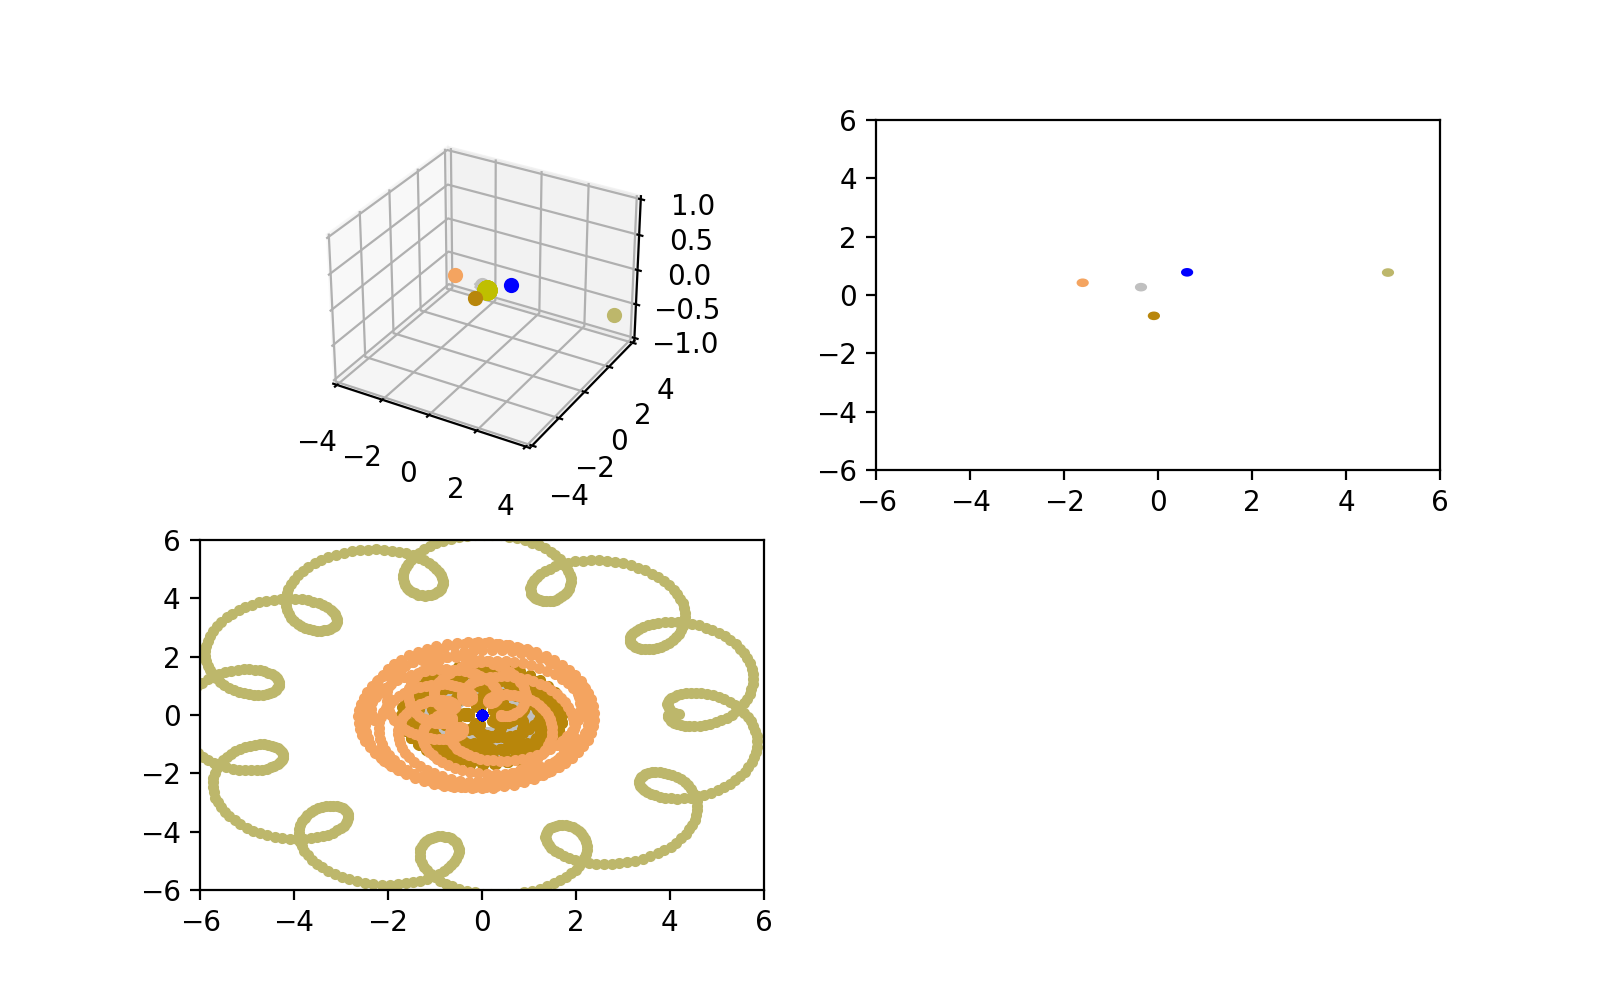

In [16]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(221,projection='3d')
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)

colors=['silver','darkgoldenrod','b',"sandybrown","darkkhaki"]

def init():
    
    ax.clear()
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(-1,1)
    
    ax1.clear()
    ax1.set_xlim(-6,6)
    ax1.set_ylim(-6,6) 
    
    ax2.clear()
    ax2.set_xlim(-6,6)
    ax2.set_ylim(-6,6) 
    
def Update(i):
    
    init()
    
    for j, p in enumerate(Planetas):
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        z = p.GetPosition(scale)[i,2]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        vz = p.GetVelocity(scale)[i,2]
    
        ax.scatter(0,0,0,s=40,color='y')
        ax.quiver(x,y,z,vx,vy,vz,color=colors[j],length=0.03)
        
        ax.scatter(x,y,z,color=colors[j])
        
        circle = plt.Circle((x,y),0.1,color=colors[j],fill=True)
        ax1.add_patch(circle)
    
    # Mercurio visto desde tierra
    Mx = Planetas[0].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    My = Planetas[0].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Venus visto desde tierra
    Vx = Planetas[1].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Vy = Planetas[1].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Tierra visto desde tierra
    Tx = Planetas[2].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Ty = Planetas[2].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Marte visto desde tierra
    Max = Planetas[3].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    May = Planetas[3].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    # Jupiter visto desde tierra
    Jx = Planetas[4].GetPosition(scale)[:i,0] - Planetas[2].GetPosition(scale)[:i,0]
    Jy = Planetas[4].GetPosition(scale)[:i,1] - Planetas[2].GetPosition(scale)[:i,1]
    
    
    ax2.scatter(Mx,My,marker='.',label='Mercurio',color = colors[0])
    ax2.scatter(Vx,Vy,marker='.',label='Venus',color = colors[1])
    ax2.scatter(Tx,Ty,marker='.',label='Venus',color = colors[2])
    ax2.scatter(Max,May,marker='.',label='Venus',color = colors[3])
    ax2.scatter(Jx,Jy,marker='.',label='Venus',color = colors[4])
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

b) Calcule el periodo de la órbita usando el perihelio o el afelio.

In [20]:
periodos = np.array([])

for planeta in Planetas:
    perihelio = planeta.GetPerihelio()
    periodos = np.append(periodos, perihelio[1] - perihelio[0])

print(periodos)

[ 0.241  0.615  1.001  1.881 11.873]


c) Grafique el periodo al cuadrado ($T^2$) en función del semi-eje mayor al cubo ($a^3$) de cada planeta.

<IPython.core.display.Javascript object>


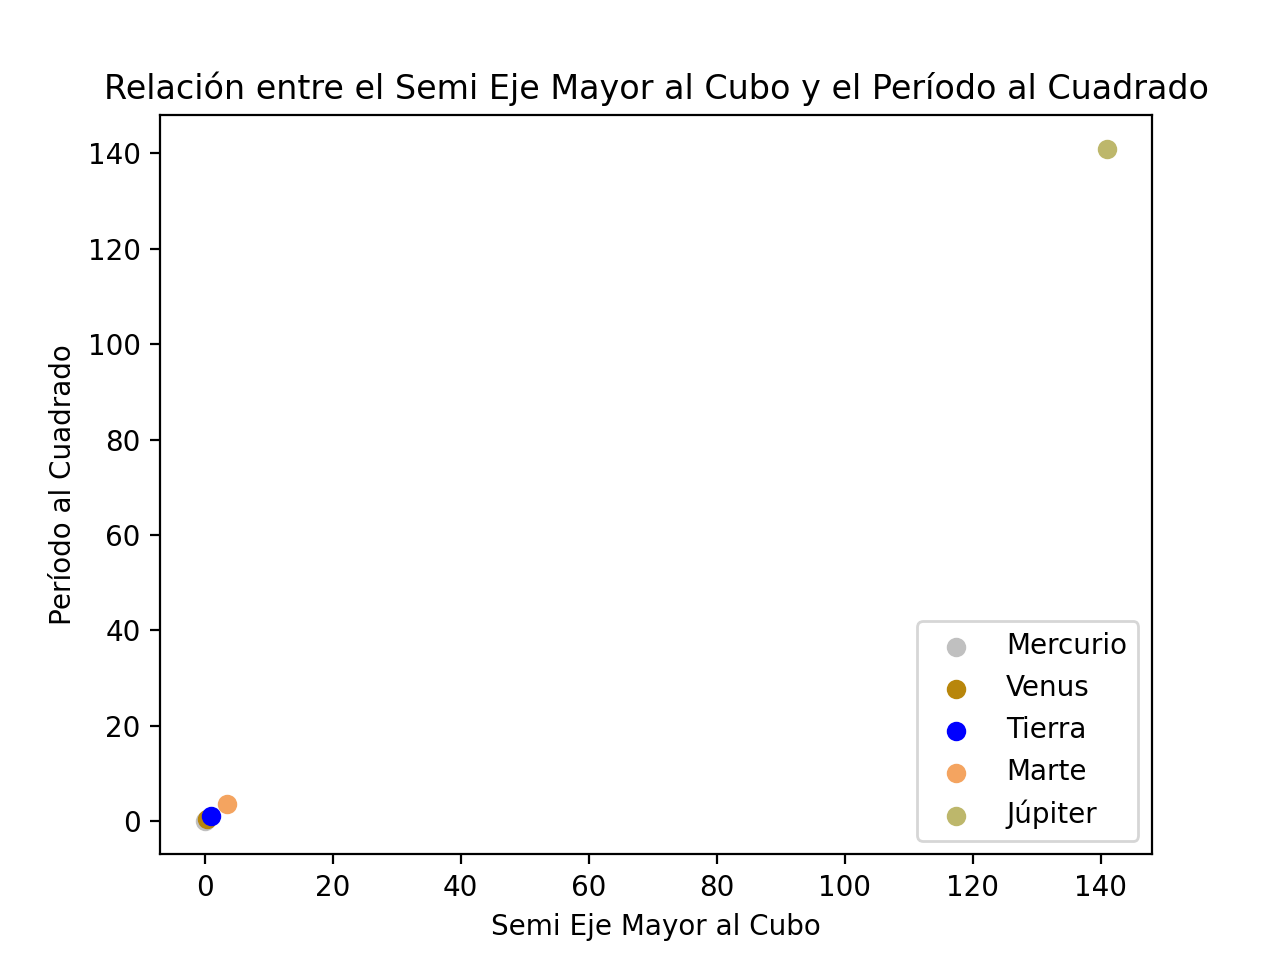

In [58]:
semi_eje_mayor = np.array([0.387, 0.723, 1.0, 1.524, 5.2044])**3
periodo_cuadrado = periodos**2
Nombre = ["Mercurio", "Venus", "Tierra", "Marte", "Júpiter"]

for i in range(len(Nombre)):
    plt.scatter(semi_eje_mayor[i], periodo_cuadrado[i], color=colors[i], label=Nombre[i])

plt.xlabel('Semi Eje Mayor al Cubo')
plt.ylabel('Período al Cuadrado')
plt.title('Relación entre el Semi Eje Mayor al Cubo y el Período al Cuadrado')    
plt.legend(loc='lower right')

d) Usando el curso de métodos I, haga la regresión lineal para encontrar pendiente y punto de corte.

Coeficiente: 1.000018736850894
Intercepto: 0.00022658702526861968


<IPython.core.display.Javascript object>


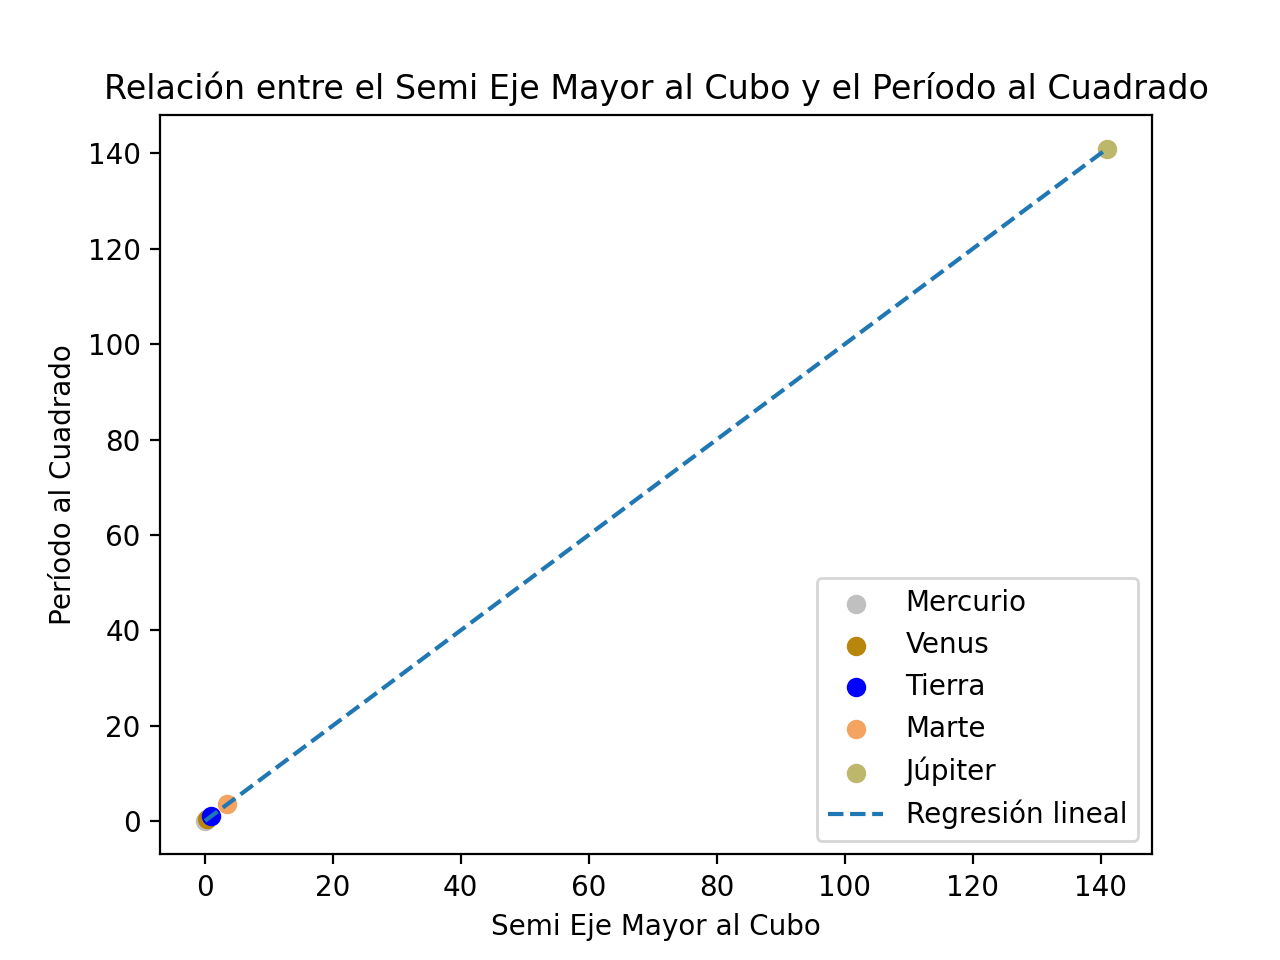

In [62]:
def minimos_cuadrados(x,y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)
    sum_x_2 = np.sum(x**2)
    pendiente = (n*sum_xy-(sum_x*sum_y))/(n*sum_x_2-(abs(sum_x)**2))
    intercepto = (sum_y*sum_x_2-sum_x*np.sum(x*y))/(n*sum_x_2-(abs(sum_x)**2))
    return pendiente,intercepto 
m,b = minimos_cuadrados(semi_eje_mayor,periodo_cuadrado)

print('Coeficiente:', m)
print('Intercepto:', b)

for i in range(len(Nombre)):
    plt.scatter(semi_eje_mayor[i], periodo_cuadrado[i], color=colors[i], label=Nombre[i])
plt.plot(semi_eje_mayor,semi_eje_mayor*m+b, label = "Regresión lineal", linestyle='dashed')
plt.xlabel('Semi Eje Mayor al Cubo')
plt.ylabel('Período al Cuadrado')
plt.title('Relación entre el Semi Eje Mayor al Cubo y el Período al Cuadrado')    
plt.legend(loc='lower right')

e) Con el valor de la pendiente, reporte la masa del sol en unidades gausiana y en el sistema internacional SI.

In [68]:
Masa_sol_gasusiana = 1/m
Masa_sol_SI = Masa_sol_gasusiana*1.9885*10**30
print("La masa del sol en unidades gausianas es:", Masa_sol_gasusiana, "[masas solares]")
print("La masa del sol en sistema internacional es:", Masa_sol_SI,"[Kg]")

La masa del sol en unidades gausianas es: 0.999981263500169 [masas solares]
La masa del sol en sistema internacional es: 1.9884627424700862e+30 [Kg]


## Punto 5

Considere la siguiente ecuación diferencial:
$$\frac{du}{dt} = \alpha u, u(0) = u_0$$
Muestre que aplicando iterativamente se obtiene:
$$u_k = (1 + \alpha\Delta t)^ku_0 $$
Para el caso donde $\alpha < 0$. Muestre que la solución numérica oscilará si $\Delta t > \frac{−1}{\alpha}$ . Ajuste $\alpha = −1$ y muestre las soluciones oscilatorias para $\Delta t = 1.1, 1.5, 1.9 s$. Por otro lado, la solución exacta nunca oscila $u(t) = e^{\alpha t}$.


Aplicando el método de Euler sobre la ecuación diferencial:

$u_0 = u_0$

$t_0 = 0$

$u_k = u_{k-1} + \Delta t \alpha u_{k-1}$

$u_1 = u_0 + \Delta t \alpha u_0 = u_0(1+\alpha \Delta t)$

$u_2 = u_1 + \Delta t \alpha u_1 = u_0(1 + \Delta t \alpha + \Delta t \alpha + (\Delta t)^2 \alpha^2) = u_0(1 + \alpha \Delta t)^2$

$u_3 = u_2 + \Delta t \alpha u_2 = u_0(1 + \alpha \Delta t)^2 + \Delta t \alpha u_0(1 + \alpha \Delta t)^2 = u_0(1+\alpha \Delta t)^3$

En general, nótese que para cualquier estructura de la forma $u_{k-1} = u_0(1+\alpha \Delta t)^{k-1}$ se tendrá que $u_k = u_0(1+\alpha \Delta t)^{k-1} + \Delta t \alpha u_0(1+\alpha \Delta t)^{k-1} = u_0(1+\alpha \Delta t)^{k-1} (1 + \alpha \Delta t) = u_0 (1+\alpha \Delta t)^{k}$

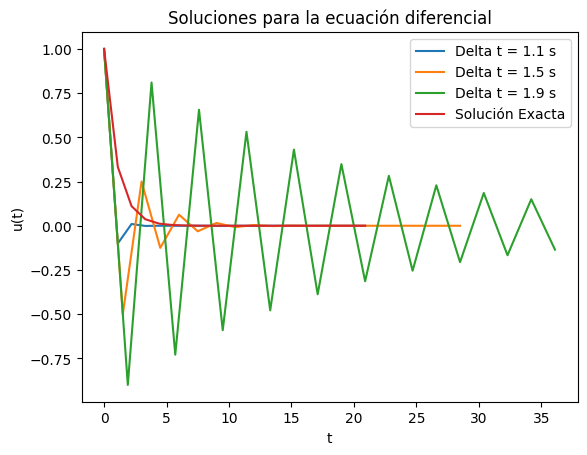

In [5]:
alpha = -1

delta_t1 = 1.1
delta_t2 = 1.5
delta_t3 = 1.9

k = np.arange(20)

u1 = (1+ alpha * delta_t1)**k
u2 = (1+ alpha * delta_t2)**k
u3 = (1+ alpha * delta_t3)**k

x1 = np.arange(0, 20*delta_t1, delta_t1)
x2 = np.arange(0, 20*delta_t2, delta_t2)
x3 = np.arange(0, 20*delta_t3, delta_t3)

exacta = np.e**(-x1)

plt.figure(dpi=100)
plt.plot(x1,u1)
plt.plot(x2,u2)
plt.plot(x3,u3)
plt.plot(x1,exacta)
plt.title("Soluciones para la ecuación diferencial")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend(["Delta t = 1.1 s","Delta t = 1.5 s", "Delta t = 1.9 s", "Solución Exacta"])
plt.show()
